In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# Adult dataset path
adult_dataset_path = "/content/adult.csv"

In [2]:
# Function for loading adult dataset
def load_adult_data(adult_path=adult_dataset_path):
     csv_path = os.path.join(adult_path)
     return pd.read_csv(csv_path)

In [3]:
# Calling load adult function and assigning to a new variable df
df = load_adult_data()
# load top 3 rows values from adult dataset
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [4]:
print ("Rows : " ,df.shape[0])
print ("Columns : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values : ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows :  48842
Columns :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Missing values :  0

Unique values : 
 age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
# checking "?" total values present in particular 'workclass' feature
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

2799

In [9]:
# checking "?" total values present in particular 'occupation' feature
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

2809

In [10]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [12]:
# find total number of rows which doesn't contain any missing value as '?'
df.apply(lambda x: x !='?',axis=1).sum()

age                48842
workclass          46043
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         46033
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     47985
income             48842
dtype: int64

In [13]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] !='?']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
native-country    811
income              0
dtype: int64

In [16]:
from sklearn import preprocessing
# encode categorical variables using label Encoder
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [17]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,2,1,4,6,3,2,1,39,0
1,2,11,2,4,0,4,1,39,0
2,1,7,2,10,0,4,1,39,1
3,2,15,2,6,0,2,1,39,1
5,2,0,4,7,1,4,1,39,0


In [18]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)
# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,39,0
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,39,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,39,1
3,44,160323,10,7688,0,40,2,15,2,6,0,2,1,39,1
5,34,198693,6,0,0,30,2,0,4,7,1,4,1,39,0


In [19]:
# look at column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              46033 non-null  int64
 1   fnlwgt           46033 non-null  int64
 2   educational-num  46033 non-null  int64
 3   capital-gain     46033 non-null  int64
 4   capital-loss     46033 non-null  int64
 5   hours-per-week   46033 non-null  int64
 6   workclass        46033 non-null  int64
 7   education        46033 non-null  int64
 8   marital-status   46033 non-null  int64
 9   occupation       46033 non-null  int64
 10  relationship     46033 non-null  int64
 11  race             46033 non-null  int64
 12  gender           46033 non-null  int64
 13  native-country   46033 non-null  int64
 14  income           46033 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [20]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')
# check df info again whether everything is in right format or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              46033 non-null  int64   
 1   fnlwgt           46033 non-null  int64   
 2   educational-num  46033 non-null  int64   
 3   capital-gain     46033 non-null  int64   
 4   capital-loss     46033 non-null  int64   
 5   hours-per-week   46033 non-null  int64   
 6   workclass        46033 non-null  int64   
 7   education        46033 non-null  int64   
 8   marital-status   46033 non-null  int64   
 9   occupation       46033 non-null  int64   
 10  relationship     46033 non-null  int64   
 11  race             46033 non-null  int64   
 12  gender           46033 non-null  int64   
 13  native-country   46033 non-null  int64   
 14  income           46033 non-null  category
dtypes: category(1), int64(14)
memory usage: 5.3 MB


In [21]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Putting independent variables/features to X
X = df.drop('income',axis=1)
# Putting response/dependent variable/feature to y
y = df['income']

In [22]:
X.head(3)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,25,226802,7,0,0,40,2,1,4,6,3,2,1,39
1,38,89814,9,0,0,50,2,11,2,4,0,4,1,39
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,39


In [23]:
y.head(3)

0    0
1    0
2    1
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [24]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country
29293,39,203070,11,0,0,49,2,8,2,5,0,4,1,39
3452,50,243115,9,0,0,40,2,11,3,0,2,4,0,39
9788,31,154227,10,0,0,40,2,15,2,13,0,4,1,39
44178,30,311913,9,0,0,40,1,11,2,0,5,4,0,39
8912,68,99106,14,0,0,20,5,12,0,9,1,4,0,39


In [25]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
# check the evaluation metrics of our default model
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# making predictions
y_pred_default = dt_default.predict(X_test)
# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10341
           1       0.79      0.53      0.64      3469

    accuracy                           0.85     13810
   macro avg       0.83      0.74      0.77     13810
weighted avg       0.84      0.85      0.84     13810



In [27]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[9861  480]
 [1616 1853]]
0.848225923244026


In [28]:
!pip install my-package

In [29]:
!pip install pydotplus

In [30]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [31]:
!pip install graphviz

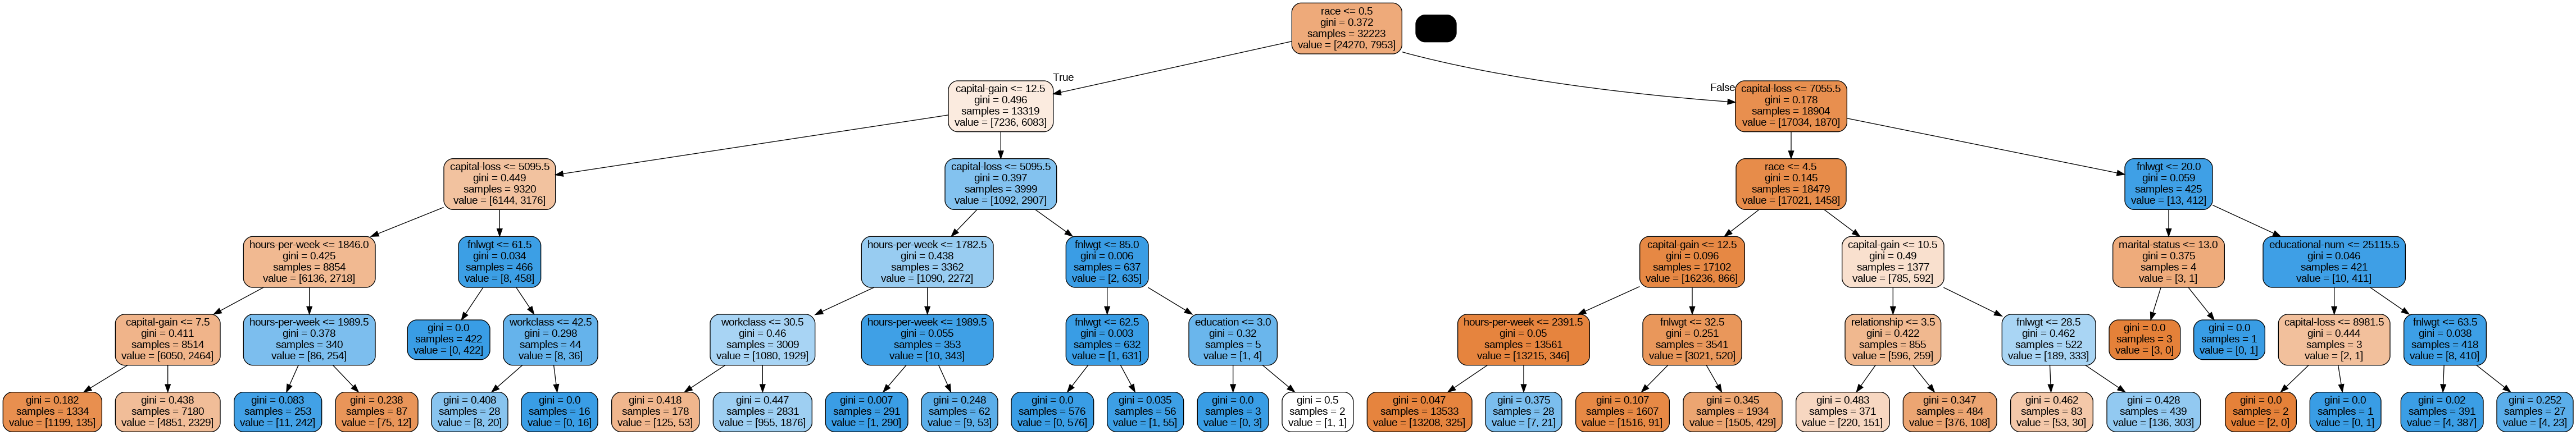

In [33]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017508,0.001094,0.003653,0.000255,1,{'max_depth': 1},0.753142,0.753142,0.753142,0.753259,0.753259,0.753189,0.000057,39
1,0.026208,0.000638,0.003497,0.000050,2,{'max_depth': 2},0.815671,0.824050,0.819860,0.829609,0.820298,0.821898,0.004681,17
2,0.035516,0.000600,0.003571,0.000109,3,{'max_depth': 3},0.829635,0.839721,0.833825,0.841248,0.834730,0.835832,0.004197,13
3,0.046339,0.002691,0.003698,0.000265,4,{'max_depth': 4},0.834135,0.847479,0.841272,0.849938,0.845748,0.843714,0.005564,8
4,0.054046,0.000881,0.003738,0.000126,5,{'max_depth': 5},0.845772,0.853530,0.841738,0.854593,0.849628,0.849052,0.004803,4


In [40]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [41]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.137336,0.004291,0.004951,0.000940,5,{'min_samples_leaf': 5},0.827153,0.826532,0.823274,0.819677,0.826040,0.824535,0.002767,10
1,0.115085,0.003973,0.004306,0.000304,25,{'min_samples_leaf': 25},0.849496,0.854461,0.844065,0.853507,0.851335,0.850573,0.003683,2
2,0.107868,0.005090,0.004147,0.000113,45,{'min_samples_leaf': 45},0.846082,0.857874,0.845927,0.853042,0.849317,0.850448,0.004531,3
3,0.101131,0.002170,0.004166,0.000221,65,{'min_samples_leaf': 65},0.846237,0.858960,0.844996,0.857387,0.852110,0.851938,0.005652,1
4,0.100600,0.004742,0.004072,0.000051,85,{'min_samples_leaf': 85},0.850737,0.860822,0.839566,0.853197,0.846524,0.850169,0.007053,4


In [44]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [45]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153947,0.002147,0.005929,0.000578,5,{'min_samples_split': 5},0.815206,0.815050,0.813189,0.814867,0.812384,0.814139,0.001139,10
1,0.143463,0.004214,0.005008,0.000071,25,{'min_samples_split': 25},0.835687,0.831963,0.827463,0.833644,0.828988,0.831549,0.002998,9
2,0.138373,0.001752,0.005027,0.000082,45,{'min_samples_split': 45},0.841117,0.842514,0.840186,0.837989,0.835506,0.839462,0.002466,8
3,0.133974,0.005993,0.004872,0.000038,65,{'min_samples_split': 65},0.849496,0.849185,0.840962,0.844817,0.840472,0.844986,0.003862,7
4,0.133274,0.005639,0.005146,0.000392,85,{'min_samples_split': 85},0.851047,0.852909,0.844531,0.849938,0.840937,0.847872,0.004449,6


In [46]:
# Create the parameter grid
param_grid = {
'max_depth': range(5, 15, 5),
'min_samples_leaf': range(50, 150, 50),
'min_samples_split': range(50, 150, 50),
'criterion': ["entropy", "gini"]
}
n_folds = 5

In [47]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
cv = n_folds, verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [48]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059965,0.001689,0.004816,0.000741,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.844686,0.850737,0.840652,0.852886,0.847145,0.847221,0.004337,11
1,0.058885,0.001184,0.004362,0.000257,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.844686,0.850737,0.840652,0.852886,0.847145,0.847221,0.004337,11
2,0.059616,0.004424,0.003817,0.000191,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.844686,0.849651,0.839721,0.852266,0.845593,0.846383,0.004317,15
3,0.056671,0.000835,0.003579,0.000023,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.844686,0.849651,0.839721,0.852266,0.845593,0.846383,0.004317,15
4,0.095637,0.003662,0.003889,0.000054,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.847944,0.857409,0.839876,0.856300,0.846524,0.849611,0.006521,5
5,0.127947,0.018810,0.005677,0.000847,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.847944,0.857409,0.839876,0.856300,0.846524,0.849611,0.006521,5
6,0.137194,0.005227,0.006264,0.001309,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845772,0.858029,0.839410,0.855214,0.843420,0.848369,0.007095,9
7,0.122113,0.018699,0.004998,0.000869,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845772,0.858029,0.839410,0.855214,0.843420,0.848369,0.007095,9
8,0.052541,0.002334,0.003601,0.000090,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.844686,0.853064,0.841893,0.854593,0.849628,0.848773,0.004839,7
9,0.051650,0.000660,0.003619,0.000087,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.844686,0.853064,0.841893,0.854593,0.849628,0.848773,0.004839,7


In [50]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8523105983446813
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [51]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,
max_depth=10,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [52]:
# accuracy score
clf_gini.score(X_test,y_test)

0.852860246198407

In [53]:
#plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

In [54]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,
max_depth=3,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(X_train, y_train)
# score
print(clf_gini.score(X_test,y_test))
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

0.8331643736422882


In [55]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     10341
           1       0.77      0.47      0.59      3469

    accuracy                           0.83     13810
   macro avg       0.81      0.71      0.74     13810
weighted avg       0.83      0.83      0.82     13810

[[9860  481]
 [1823 1646]]
